In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\diabetes (1).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
round((df.isnull().sum()/df.shape[0])*100,2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

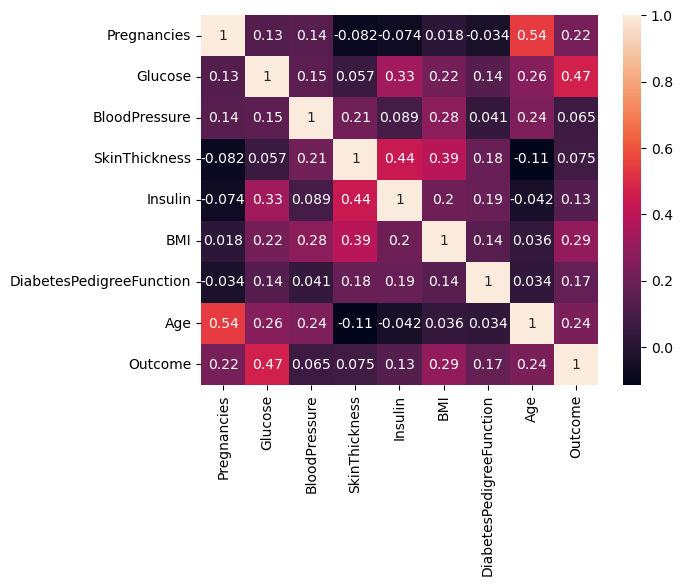

In [6]:
# To understand the relationship between each variable
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# EDA

## Target Variable Understanding

### Count Plot

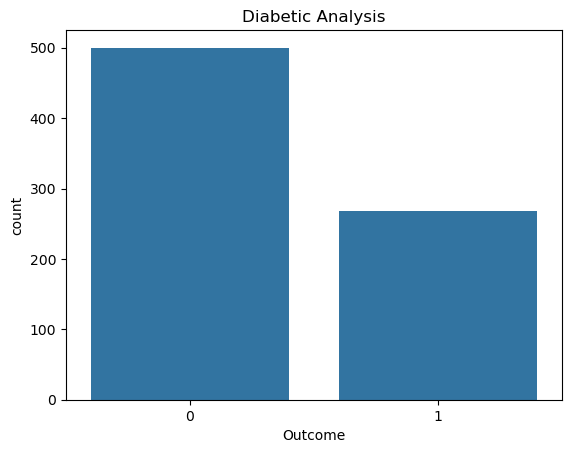

In [25]:
sns.countplot(x = 'Outcome', data=df)
plt.title('Diabetic Analysis')
plt.show()

<p>The dataset shows a higher proportion of individuals as non-diabetic compared to those with the condition, indicating class imbalance that should be considered during model evaluation.</p>

## Univariate Analysis

### Density Plot

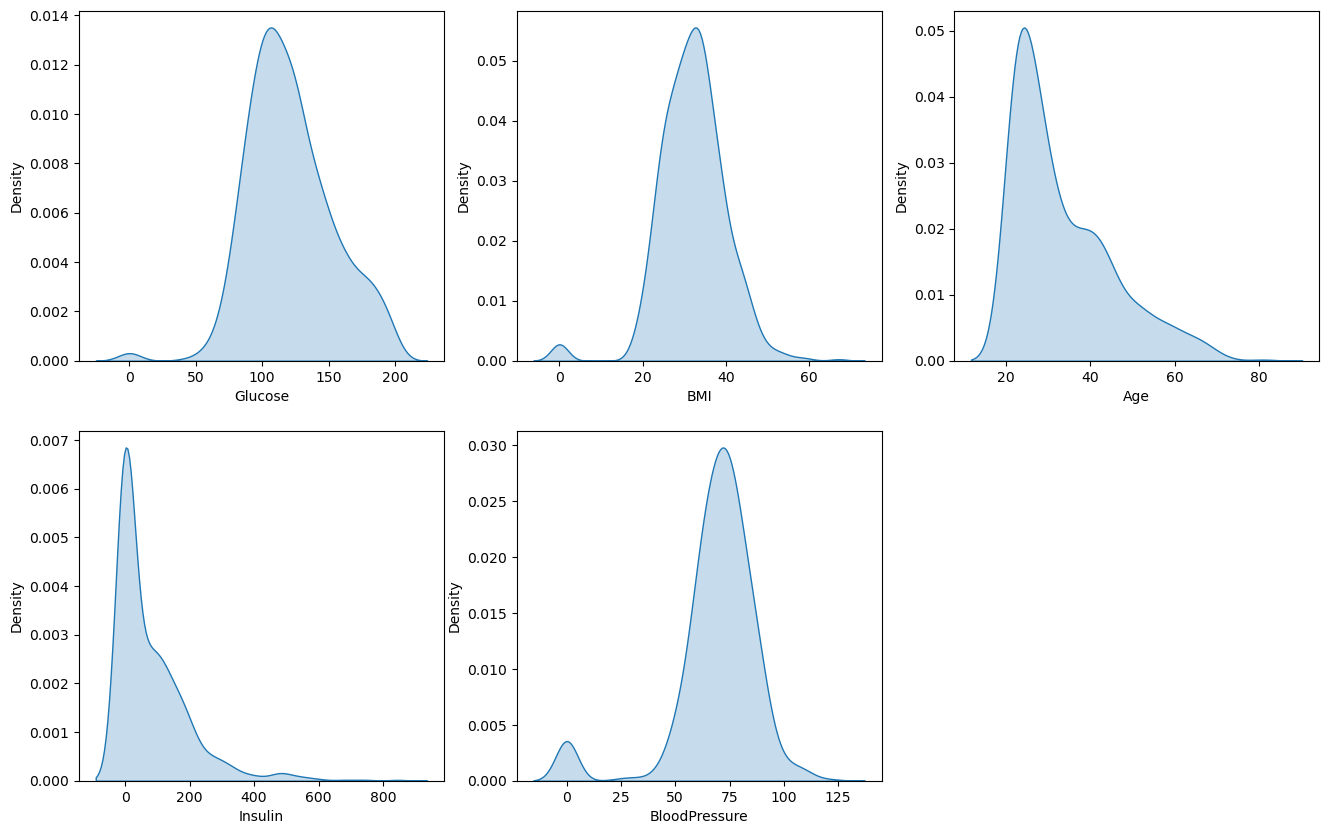

In [39]:
plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
sns.kdeplot(df['Glucose'], fill = True)


plt.subplot(2,3,2)
sns.kdeplot(df['BMI'], fill = True)

plt.subplot(2,3,3)
sns.kdeplot(df['Age'], fill = True)

plt.subplot(2,3,4)
sns.kdeplot(df['Insulin'], fill = True)

plt.subplot(2,3,5)
sns.kdeplot(df['BloodPressure'], fill = True)

plt.show()

<p>The density plots show that Glucose and BMI are approximately normal but right-skewed, Age and Insulin are highly skewed, and several variables contain zero values representing missing data. This indicates the need for preprocessing steps like imputation, transformation, and scaling before applying machine learning models.</p>

### Boxplot

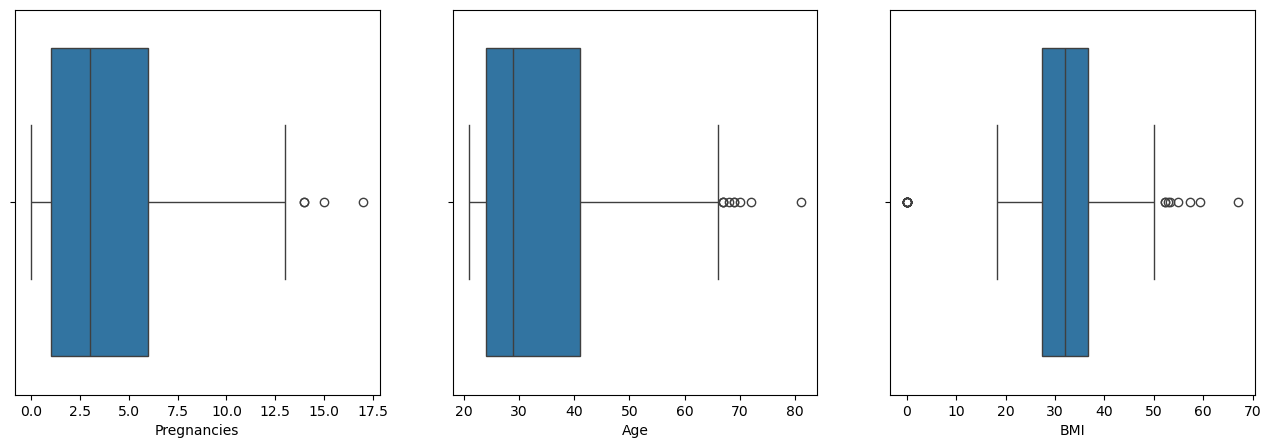

In [40]:
# To find the outliers
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(x='Pregnancies',data=df)

plt.subplot(1,3,2)
sns.boxplot(x='Age',data=df)

plt.subplot(1,3,3)
sns.boxplot(x='BMI',data=df)

plt.show()

<p>The boxplots show that Pregnancies, Age, and BMI are right-skewed with several high-end outliers. Median BMI lies in the obese range, and Age is concentrated in younger adults. These patterns suggest the need for robust preprocessing and outlier-aware ML models</p>

## Bivariate Analysis

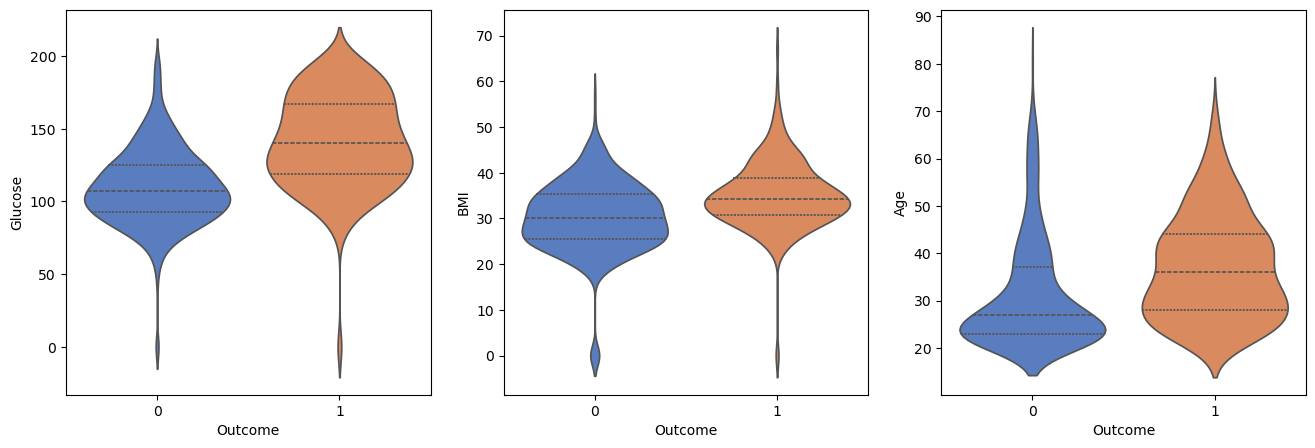

In [36]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.violinplot(
    x='Outcome',
    y='Glucose',
    data=df,
    hue='Outcome',
    inner='quartile',
    palette='muted',
    legend=False
)
plt.xlabel('Outcome')
plt.ylabel('Glucose')

plt.subplot(1,3,2)
sns.violinplot(
    x='Outcome',
    y='BMI',
    data=df,
    hue='Outcome',
    inner='quartile',
    palette='muted',
    legend=False
)
plt.xlabel('Outcome')
plt.ylabel('BMI')

plt.subplot(1,3,3)
sns.violinplot(
    x='Outcome',
    y='Age',
    data=df,
    hue='Outcome',
    inner='quartile',
    palette='muted',
    legend=False
)
plt.xlabel('Outcome')
plt.ylabel('Age')

plt.show()

<p>The violin plots show that glucose has the strongest separation between diabetic and non-diabetic groups, while BMI and age show moderate overlap, supporting the need for multivariate machine learning models.</p>

# DATA PREPROCESSING

## Imputation (Handling Missing / Invalid Values)

In [41]:
import numpy as np
from sklearn.impute import SimpleImputer

cols_with_zero = ['Glucose', 'BMI', 'BloodPressure', 'Insulin']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])


## Transformation (Handling Skewness & Outliers)

In [44]:
df['Insulin_log'] = np.log1p(df['Insulin'])
df['BMI_log'] = np.log1p(df['BMI'])
df['Glucose_log'] = np.log1p(df['Glucose'])


In [46]:
# Drop BMI, Glucose, and Insulin column after scaling

df.drop('Insulin',axis=1, inplace=True)
df.drop('BMI',axis=1,inplace=True)
df.drop('Glucose',axis=1,inplace=True)

## Scaling (Making Features Comparable)

In [45]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[['Age','BMI_log','Glucose_log','Insulin_log','BloodPressure','Pregnancies']])


# TRAIN TEST SPLIT

In [48]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [49]:
X.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Insulin_log,BMI_log,Glucose_log
0,6,72.0,35,0.627,50,4.836282,3.543854,5.003946
1,1,66.0,29,0.351,31,4.836282,3.317816,4.454347
2,8,64.0,0,0.672,32,4.836282,3.190476,5.214936
3,1,66.0,23,0.167,21,4.553877,3.370738,4.499810
4,0,40.0,35,2.288,33,5.129899,3.786460,4.927254


In [50]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [52]:
X_train.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Insulin_log,BMI_log,Glucose_log
416,1,68.0,21,1.095,22,4.836282,3.339322,4.584967
373,2,58.0,40,0.225,25,4.553877,3.580737,4.663439
166,3,66.0,25,0.256,22,4.836282,3.511545,5.003946
685,2,74.0,26,0.591,25,5.327876,3.532226,4.867534
156,2,52.0,15,0.637,21,4.553877,3.242592,4.605170


# MODELLING

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=2000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [54]:
y_pred=model_LR.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7748917748917749


In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[138  15]
 [ 37  41]]


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       153
           1       0.73      0.53      0.61        78

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



## Gaussian NB

In [59]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

y_pred = model_GNB.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7402597402597403


## Kneighbours Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model_KNC = KNeighborsClassifier(n_neighbors=5)
model_KNC.fit(X_train, y_train)

y_pred = model_KNC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5714285714285714


## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(random_state=42)
model_DTC.fit(X_train, y_train)

y_pred = model_DTC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666


## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train, y_train)

y_pred = model_RFC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7575757575757576


## SVC

In [63]:
from sklearn.svm import SVC

model_SVC = SVC(kernel='rbf')
model_SVC.fit(X_train, y_train)

y_pred = model_SVC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6753246753246753


## Gradient Boosting Classifier 

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)

y_pred = model_GBC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7445887445887446


In [67]:
import joblib
joblib.dump(model_LR,'Best_Diabetic_model.pkl')


['Best_Diabetic_model.pkl']

<p>The objective of this project was to predict/classify Diabetic using diabetes (1).csv and identify the most suitable machine learning model. Multiple models including Logestic Regression, Gaussian NB, KNeighbors Classifier, Decision Tree, Random Forest, Support Vector Classifier and Gradient Boosting Classifier were trained and evaluated. Models were evaluated using accuracy on the test dataset. Among all models, the Logestic Regression achieved the highest accuracy of 77%. Therefore, based on comparative analysis and evaluation metrics, 'Best_Diabetic_model.pkl' is concluded to be the best-fit model for this problem and can be effectively used for future predictions.</p>